In [ ]:
'''


In this whole module , we will learn 

how u can use SQL queries to extract data 
& then later on , instead of SQL queries , how u can ask question in simple English to extract data using GenAI !
& wew ill leanr how Your GenAI can return you optiimized SQL query !


'''

# 1.. Connect with SQL Database (Beginner: SQLite)

In [ ]:
'''

What is a database ?

A database is like a digital notebook where data is stored in an organized way, 
so we can save, search, and update information easily..

Real-life example 📒


'''

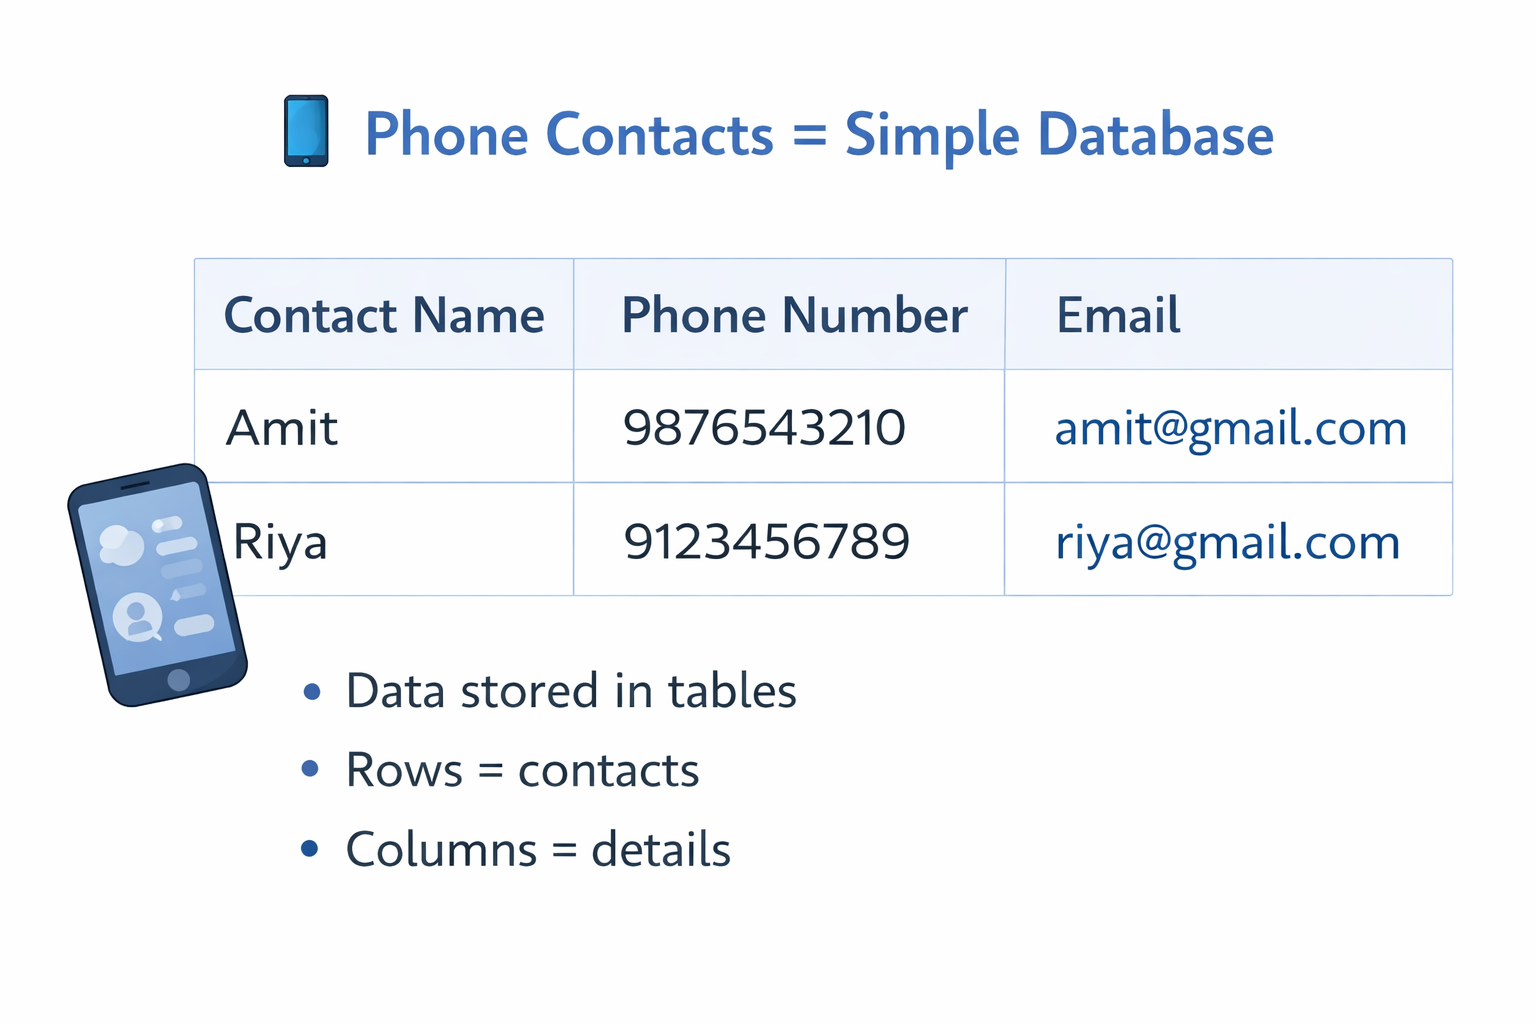

In [ ]:
'''

Relational Dbs
Here data is stored in the form of tables (rows , cols) , thats why they are known as Table centric dbs..
MYSQL , PostGreSQL , SQLite , Microsoft SQL Server

& u can use Structured query lang to extract data from these SQL dbs..




Non relational Dbs 
where data is stored in the form of Documents , thats why they are document-centric dbs..
MongoDB , Cassandra , Redis !

MongoDB Query Language (MQL)
CQL (Cassandra Query Language)



'''

In [ ]:
'''

SQLite is a small, lightweight database that stores data in one single file on your device.

👉 No server.
👉 No setup.
👉 Just a file.



Your phone apps (contacts, notes, WhatsApp, etc.) store data locally using SQLite.

For example:

Your contacts are saved in a .db file
That file is an SQLite database
The app reads and writes data from that file



'''

In [ ]:
'''

In order to extract data from SQLite db , u have to follow 2 steps:

1 ) Establish connection to SQLite db
2 ) Using "SQL query" , extract data from database..


'''

In [1]:
import sqlite3
import pandas as pd

In [2]:
# very first u have to create a SQL connection to our SQLite database
## con = sqlite3.connect(r"Z:\2.. Zomato\Datasets/zomato_rawdata.sqlite")

con = sqlite3.connect(r"R:\All_Datasets\2.. Zomato\Datasets\zomato_rawdata.sqlite")

In [ ]:
## Once your connection to database is ready , then u have to extract data from table !

In [8]:
## Print all tables present in THAT database

tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", con)
tables

## u can use pd.read_sql_query() as well !

,name
0,Users


# 2.. Extract Data using SQL Queries → DataFrame

In [9]:
df = pd.read_sql_query("SELECT * FROM Users" , con)

In [ ]:
'''

SELECT = choose / pick data
👉 Tells the database : “I want to see some data.”

🔹 * (star symbol)  = everything
👉 Means : “Show me all columns.”

Example columns in Users table:

name
email
age
city

* means → show all of them



🔹 FROM
FROM = where the data is
👉 Tells the database : “Get the data from this table.”




'''

In [10]:
df.shape

(51717, 18)

In [11]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [19]:
query = """
SELECT address, name, book_table, rate , reviews_list
FROM Users
WHERE online_order == 'No';
"""

In [20]:
df_no = pd.read_sql(query, con)
df_no.shape

(21273, 5)

In [21]:
df_no.head(4)

,address,name,book_table,rate,reviews_list
0,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,3.7/5,"[('Rated 4.0', ""RATED\n Great food and proper..."
1,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,3.8/5,"[('Rated 4.0', 'RATED\n Very good restaurant ..."
2,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,3.6/5,"[('Rated 5.0', 'RATED\n Awesome food ??Great ..."
3,"111, Sapphire Toys Building, 100 Feet Ring Roa...",Caf-Eleven,No,4.0/5,"[('Rated 2.0', ""RATED\n This is a hookah cafe..."


In [ ]:
'''
Similarly , u can establish connection with some other relational Databases like : MySQL and PostgreSQL

You just need to:
✅ install the Python connector library
✅ provide database credentials (host, username, password, database name)
✅ Then run SQL queries to fetch data into Pandas.


'''

In [75]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# 3.. GenAI for SQL generation

In [ ]:
'''

now instead of writing SQL queries manually & spending time , 
we will ask question in simple English & GenAI will return SQL query !

✅ It means , “In GenAI-powered analytics, you don’t need SQL. 
    You can ask questions in normal English, and LLM converts it to SQL automatically.”

'''

In [27]:
## takes 5-10 sec 

from langchain_groq import ChatGroq

llm = ChatGroq(
    model="openai/gpt-oss-120b", ## u can use some other models as well.. (just copy model from console.groq.com/playground)
    temperature = 0,
    groq_api_key = groq_api_key
)

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [40]:
table_schema = """
Table: Users

Columns:
- index (INTEGER)
- url (TEXT)
- address (TEXT)
- name (TEXT)
- online_order (TEXT)
- book_table (TEXT)
- rate (TEXT)
- votes (INTEGER)
- phone (TEXT)
- location (TEXT)
- rest_type (TEXT)
- dish_liked (TEXT)
- cuisines (TEXT)
- approx_cost_for_two_people (REAL)
- reviews_list (TEXT)
- menu_item (TEXT)
- listed_in_type (TEXT)
- listed_in_city (TEXT)
"""

In [41]:
question = "Which location has the most restaurants ?"

In [48]:
prompt = f"""
You are an expert SQL analyst.


Database schema : {table_schema}

Question : {question}

Rules:
- Use table name exactly: Users
- Handle rate column carefully (it's TEXT, may contain '/5' or missing values)
- Write Only one SQL Statement(no explanation, no markdown, no backticks).

"""


In [49]:
response = llm.invoke(prompt)

In [50]:
sql = response.text
print(sql)


SELECT location FROM Users GROUP BY location ORDER BY COUNT(*) DESC LIMIT 1


In [53]:
pd.read_sql("SELECT location FROM Users GROUP BY location ORDER BY COUNT(*) DESC LIMIT 1",  con)

,location
0,BTM


In [ ]:
'''

✅ Other English questions you can ask (Zomato dataset) :

“Which cuisines are most common?”
“Top 5 cuisines in Bangalore”


'''

# 4.. SQL debugging using GenAI

In [ ]:
'''

Students can often face error while writing SQL queries  , so lets generate a prompt which can handle their errors :


'''

In [55]:
## Imagine this is the sql query , that a student have written !
## Task : 👉 Top 5 locations with the highest average restaurant rating.

## & he has used wrong column name "rating" and "cost" & they dont exist !
## as right columns are : "rate" and "Approx_cost"


wrong_sql = """
SELECT location, AVG(rating) AS avg_rating
FROM Users
GROUP BY location
ORDER BY avg_rating DESC
LIMIT 5;
"""


# ✅ Problem:

# Column rating does not exist
# Correct column = rate (and it’s TEXT, contains /5)

In [ ]:
## pd.read_sql(wrong_sql , con) ->> returns error : "No such column as rating"

In [54]:
df["rate"][0]

'4.1/5'

In [ ]:
'''

So lets leverage power of GenAI to handle such error :


'''

In [57]:
prompt = f"""
You are a SQL debugging assistant.

Fix the SQL query so it runs correctly.

Schema : {table_schema}
Wrong SQL : {wrong_sql}

Rules:
- Return ONLY corrected SQL
- Use table name : Users
- rate column is TEXT (may contain '/5' or missing), convert it to numeric safely
"""


In [61]:
response = llm.invoke(prompt)
fixed_sql = response.content
print(fixed_sql)

SELECT location,
       AVG(
           CASE
               WHEN rate IS NULL OR rate = '' THEN NULL
               WHEN instr(rate, '/') > 0 THEN CAST(substr(rate, 1, instr(rate, '/') - 1) AS REAL)
               ELSE CAST(rate AS REAL)
           END
       ) AS avg_rating
FROM Users
GROUP BY location
ORDER BY avg_rating DESC
LIMIT 5;


In [64]:
query = """
SELECT location,
       AVG(
           CASE
               WHEN rate IS NULL OR rate = '' THEN NULL
               WHEN instr(rate, '/') > 0 THEN CAST(substr(rate, 1, instr(rate, '/') - 1) AS REAL)
               ELSE CAST(rate AS REAL)
           END
       ) AS avg_rating
FROM Users
GROUP BY location
ORDER BY avg_rating DESC
LIMIT 5;
"""


pd.read_sql(query, con)

## 👉 Top 5 locations with the highest average restaurant rating..

,location,avg_rating
0,Lavelle Road,4.042886
1,St. Marks Road,4.017201
2,Koramangala 3rd Block,3.978756
3,Sankey Road,3.965385
4,Church Street,3.963091


# 5.. Query optimization prompts !

In [ ]:
## Optimization = query faster + efficient..

In [65]:
question = "Which location has the most restaurants?"

In [67]:
## ✅ 1) Slow SQL (Beginner writes this)

slow_sql = """
SELECT location, COUNT(*)
FROM Users
GROUP BY location
ORDER BY COUNT(*) DESC;
"""

In [68]:
pd.read_sql_query(slow_sql , con)

,location,COUNT(*)
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144
...,...,...
89,Yelahanka,6
90,West Bangalore,6
91,Jakkur,3
92,Rajarajeshwari Nagar,2


In [ ]:
'''
SELECT location, COUNT(*) : Extract area name & total restaurants in that area name

FROM Users : means you have all the Zomato data/records in "Users" table..

GROUP BY location : combine/group restaurants based on "location"

Sort the results (highest - lowest)



COUNT(*) means count total restaurants in that area

'''

In [ ]:
'''

✅ Works, but can be slow for large dataset because:

1) The database will read all rows in the table (Example: 1 lakh rows → it reads all 1 lakh)

2) It groups all rows (Database has to collect restaurants location-wise & then calculate AVG rating for each location)
      This requires a lot of work internally..
      
3) Then sort the rating (Sorting is slow because it compares many rows)


## This query is slow because database here read data + group + calculate + sort a lot of data ..

'''

In [73]:
prompt = f"""
You are a SQL performance expert.

Optimize this SQL query for performance.

Schema:
{table_schema}

SQL:
{slow_sql}

Rules:

- Return ONLY optimized SQL
"""


In [74]:
response = llm.invoke(prompt)
print(response.text)

```sql
-- Covering index to accelerate the GROUP BY
CREATE INDEX IF NOT EXISTS idx_users_location ON Users(location);

-- Optimized aggregation
SELECT
    location,
    COUNT(*) AS cnt
FROM
    Users
GROUP BY
    location
ORDER BY
    cnt DESC;
```


In [ ]:
'''

In optimized query , it is actually using indexing which will speeds up grouping !


We first create an index on location to speed up grouping, 
then we count rows per location and sort locations by highest count.

'''